# Mod 5 Project - Capstone
   * Student name: THOMAS J WHIPPLE
   * Student pace: Part-time student
   * Scheduled project review date/time: FRIDAY, JULY 15, 2020, 10:00am
   * Instructor name: JEFF HERMAN 
   * Blog post URL:

How can I use data to improve my local ski mountain?

# Import Necessary Libraries

In [184]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

import geopy.distance

from sklearn.cluster import KMeans

import folium
from folium import plugins
from folium.plugins import HeatMap
from pywaffle import Waffle 


# Load the Data

I was given four datasets from Magic Mountain Resort. These are the Liftopia ski ticket data collected from the last four years, 2017 - 2020.

In [185]:
# Liftopia data from 2017
df_2017 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.16 to 4.9.17.csv")
# Liftopia data from 2018
df_2018 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.17 to 4.8.18.csv")
# Liftopia data from 2019
df_2019 = pd.read_csv("Data_Folder/Online Liftopia Magic Store Guest sales 10.1.18 to 4.7.19.xls.csv")
# Liftopia data from 2020 - this data set has less since the resort closed early due to Covid-19
df_2020 = pd.read_csv("Data_Folder/Online Liftopia magic store Guests 10.1.19 to 3.15.20.csv")
df_2020.head()

order_id   ticket_id order_status                              product  \
0         NaN         NaN          NaN                                  NaN   
1  12833501.0  T115609601         PAID  Magic Mountain | 1 Day Lift Tickets   
2  12833501.0  T115609602         PAID  Magic Mountain | 1 Day Lift Tickets   
3  12833547.0  T115609703         PAID  Magic Mountain | 1 Day Lift Tickets   
4  12833547.0  T115609704         PAID  Magic Mountain | 1 Day Lift Tickets   

  ticket_type           store order_date  trip_date marketing_opt_in  \
0         NaN             NaN        NaN        NaN              NaN   
1       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
2       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
3       Adult  Magic Mountain  6/27/2019  1/26/2020               No   
4       Adult  Magic Mountain  6/27/2019  1/26/2020               No   

  purchaser_address  ... guest_height guest_weight guest_gender  \
0               NaN  ...          NaN          NaN          NaN   
1      21194 Rt. 22  ...          NaN          NaN          NaN   
2      21194 Rt. 22  ...          NaN          NaN          NaN   
3      21194 Rt. 22  ...          NaN          NaN          NaN   
4      21194 Rt. 22  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [186]:
# Put the four datasets into one dataframe
data = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0, sort=False)
data.reset_index(drop=True, inplace=True)
data.head()

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [187]:
data.shape

(20510, 28)

# EDA

In [188]:
# Most of the data is categorical
data.describe()

order_id  net_rate_revenue  barcode  guest_height  guest_weight  \
count  2.050900e+04      20506.000000      0.0   1358.000000   1358.000000   
mean   1.223341e+07         51.058487      NaN     66.582474    150.027982   
std    1.151902e+06         24.027872      NaN      5.618835     42.383039   
min    1.009710e+07          1.860000      NaN     43.000000     36.000000   
25%    1.131234e+07         37.390000      NaN     64.000000    121.000000   
50%    1.217216e+07         47.420000      NaN     67.000000    150.000000   
75%    1.324507e+07         57.650000      NaN     71.000000    180.000000   
max    1.428648e+07        261.320000      NaN     82.000000    331.000000   

       guest_shoe_size  
count      1358.000000  
mean          8.990795  
std           2.247431  
min           1.000000  
25%           7.500000  
50%           9.000000  
75%          10.500000  
max          14.500000

In [189]:
# Total of 28 columns
data.columns

Index(['order_id', 'ticket_id', 'order_status', 'product', 'ticket_type',
       'store', 'order_date', 'trip_date', 'marketing_opt_in',
       'purchaser_address', 'purchaser_city', 'purchaser_state',
       'purchaser_zip', 'purchaser_country', 'net_rate_revenue', 'currency',
       'barcode', 'guest_birthdate', 'guest_height', 'guest_weight',
       'guest_gender', 'guest_ability_level', 'guest_shoe_size',
       'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
       'custom_field_question', 'custom_field_response'],
      dtype='object')

In [190]:
# 20,509 rows with lots of missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 28 columns):
order_id                  20509 non-null float64
ticket_id                 20509 non-null object
order_status              20509 non-null object
product                   20509 non-null object
ticket_type               20509 non-null object
store                     20509 non-null object
order_date                20509 non-null object
trip_date                 20509 non-null object
marketing_opt_in          20509 non-null object
purchaser_address         14222 non-null object
purchaser_city            19822 non-null object
purchaser_state           19755 non-null object
purchaser_zip             19819 non-null object
purchaser_country         19798 non-null object
net_rate_revenue          20506 non-null float64
currency                  20509 non-null object
barcode                   0 non-null float64
guest_birthdate           1358 non-null object
guest_height              135

### Guest Data

In [191]:
# Keep in mind that there are only 1358 rows of the 20509 or about 6.6% of the data

In [192]:
# I imagine that the majority of skiiers with experience don't enter this info.
data.guest_ability_level.value_counts()

Beginner                  646
Intermediate              541
Advanced                  120
Type I (Beginner)          34
Type II (Intermediate)     13
Type III (Advanced)         4
Name: guest_ability_level, dtype: int64

In [193]:
# This is interesting in only the fact that it is probably for rental equipment
data.guest_equipment_choice.value_counts()

Skis                             1134
Snowboard: Left Foot Forward      143
Snowboard: Right Foot Forward      81
Name: guest_equipment_choice, dtype: int64

### Guest Age

In [194]:
# Again, I have less than 7% of birthdates from the dataset
data.guest_birthdate.count()

1358

In [195]:
# Create a new df for age
age = data.filter(['guest_birthdate', 'trip_date'], axis=1)

In [196]:
age.head()

guest_birthdate   trip_date
0             NaN  12/31/2016
1             NaN  12/31/2016
2             NaN  12/31/2016
3             NaN  12/31/2016
4             NaN   2/16/2017

In [197]:
# Convert both dates to datetime
age['guest_birthdate'] = pd.to_datetime(age['guest_birthdate'])
age['trip_date'] = pd.to_datetime(age['trip_date'])

In [198]:
# Lots of missing data here as well
age.head()

guest_birthdate  trip_date
0             NaT 2016-12-31
1             NaT 2016-12-31
2             NaT 2016-12-31
3             NaT 2016-12-31
4             NaT 2017-02-16

In [199]:
# Drop the missing values
age = age.dropna()

In [200]:
# Check out the age df
age.head()

guest_birthdate  trip_date
2849      1995-04-25 2018-01-20
2864      1968-08-29 2018-01-13
2895      1969-12-17 2018-01-13
2896      1971-02-01 2018-01-13
2897      2000-09-16 2018-01-13

In [201]:
# What is the mean birthdate?
age.guest_birthdate.mean()

Timestamp('1990-04-03 14:10:25.625920512')

In [202]:
# Now I want to figure out how old they are...
age['years_old'] = (age['trip_date'] - age['guest_birthdate'])

In [203]:
# Change this datetime value to years 'Y'
age['years_old'] = age['years_old']/np.timedelta64(1,'Y')

In [204]:
# Look at the new column
age.head()

guest_birthdate  trip_date  years_old
2849      1995-04-25 2018-01-20  22.741056
2864      1968-08-29 2018-01-13  49.375415
2895      1969-12-17 2018-01-13  48.074909
2896      1971-02-01 2018-01-13  46.949629
2897      2000-09-16 2018-01-13  17.325476

In [205]:
# Not sure why there are negative ages
age.years_old.describe()

count    1358.000000
mean       28.828437
std        14.263492
min        -0.637932
25%        17.551353
50%        26.337296
75%        38.617494
max        77.781200
Name: years_old, dtype: float64

In [206]:
# Guess some people just put in a random date
age[age.years_old < 0]

guest_birthdate  trip_date  years_old
5174       2018-10-08 2018-02-17  -0.637932
5441       2018-04-30 2018-02-19  -0.191653
7178       2018-05-26 2018-03-22  -0.177964
7179       2018-10-12 2018-03-22  -0.558533
18785      2020-07-18 2020-02-17  -0.416162

In [207]:
# Get rid of all those negatives
age = age[age.years_old > 0] 

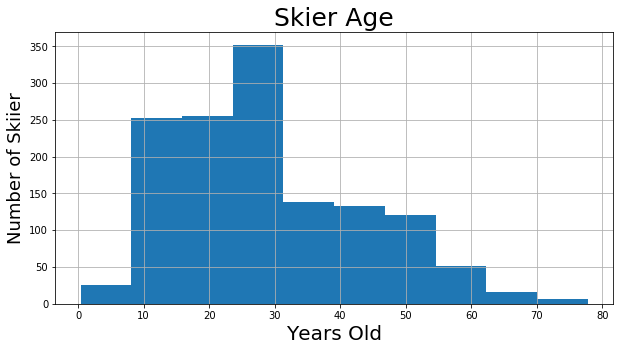

In [208]:
# Get a visual of ages
age.years_old.hist(figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skier Age', fontsize=25)
plt.show()

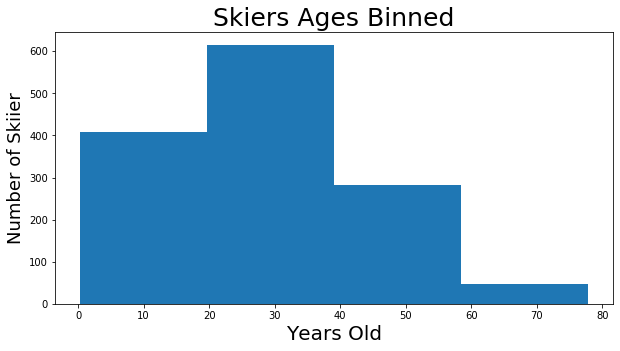

In [209]:
# Thought I'd look at ages in terms of groups
age.years_old.hist(bins=4, grid=False, figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skiers Ages Binned', fontsize=25)
plt.show()

***While it may not be representative of the whole dataset, it's still interesting -
though it may also be similar to all USA age demographics in general***

## Get rid of guest_data columns

In [210]:
# All the columns that don't have enough information - going to drop
guest_data = ['barcode', 'guest_birthdate', 'guest_height', 'guest_weight', 
              'guest_gender', 'guest_ability_level', 'guest_shoe_size',
              'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
              'custom_field_question', 'custom_field_response']
df = data.drop(columns = guest_data, axis=0)                
df.head()         

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address purchaser_city purchaser_state purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT          6413   
1  23 Jefferson Circle        Clinton              CT          6413   
2  23 Jefferson Circle        Clinton              CT          6413   
3  23 Jefferson Circle        Clinton              CT          6413   
4                  NaN       Guilford              VT          5301   

  purchaser_country  net_rate_revenue currency  
0                US             50.21      USD  
1                US             69.74      USD  
2     United States             50.21      USD  
3     United States             69.74      USD  
4     United States             19.54      USD

### Country

In [211]:
# Check out the different countries where people come from to ski
df['purchaser_country'].value_counts()

US               17374
United States     2303
CA                  41
GB                  26
Canada               8
AU                   7
SE                   5
DK                   5
DO                   4
Australia            4
PR                   4
Brazil               3
DE                   3
NO                   3
Denmark              2
Other                2
BR                   2
NL                   2
Name: purchaser_country, dtype: int64

In [212]:
# We don't need the USA twice!
df['purchaser_country'].replace(to_replace='United States', value='US', inplace=True)

In [213]:
# Check to see if it worked.
df['purchaser_country'].value_counts()

US           19677
CA              41
GB              26
Canada           8
AU               7
DK               5
SE               5
Australia        4
PR               4
DO               4
NO               3
DE               3
Brazil           3
Other            2
BR               2
Denmark          2
NL               2
Name: purchaser_country, dtype: int64

In [214]:
# What are these other places?
# CA is Candada, GB looks like Great Britian... Europe
df.loc[df['purchaser_country'] == 'Other']

order_id   ticket_id order_status  \
5  10099851.0  T110737788    CANCELLED   
6  10099851.0  T110737789    CANCELLED   

                                       product ticket_type           store  \
5  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   
6  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   

   order_date trip_date marketing_opt_in          purchaser_address  \
5  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   
6  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
5   Diego Martin           Other             0             Other   
6   Diego Martin           Other             0             Other   

   net_rate_revenue currency  
5             48.35      USD  
6             48.35      USD

In [215]:
# Get rid of everything that isn't USA
df = df[df['purchaser_country'] == 'US']

In [216]:
# See if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id             19677 non-null float64
ticket_id            19677 non-null object
order_status         19677 non-null object
product              19677 non-null object
ticket_type          19677 non-null object
store                19677 non-null object
order_date           19677 non-null object
trip_date            19677 non-null object
marketing_opt_in     19677 non-null object
purchaser_address    14111 non-null object
purchaser_city       19675 non-null object
purchaser_state      19608 non-null object
purchaser_zip        19672 non-null object
purchaser_country    19677 non-null object
net_rate_revenue     19677 non-null float64
currency             19677 non-null object
dtypes: float64(2), object(14)
memory usage: 2.6+ MB


### Other Columns

In [217]:
# What is the Order ID and is it important?
df['order_id'].value_counts()

11006409.0    11
10511636.0     9
10485804.0     9
14046002.0     9
10151249.0     9
              ..
11181119.0     1
14065118.0     1
11443644.0     1
12589735.0     1
11456077.0     1
Name: order_id, Length: 10876, dtype: int64

In [218]:
# Looks like some people make multiple orders, for groups maybe
df[df['order_id'] == 11006409.0].head()

order_id   ticket_id order_status  \
3345  11006409.0  T112358047         PAID   
3346  11006409.0  T112358048         PAID   
3347  11006409.0  T112358049         PAID   
3348  11006409.0  T112358050         PAID   
3349  11006409.0  T112358051         PAID   

                                  product     ticket_type           store  \
3345  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3346  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3347  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3348  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   
3349  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   

      order_date   trip_date marketing_opt_in purchaser_address  \
3345  12/26/2017  12/27/2017               No         37 Brooks   
3346  12/26/2017  12/27/2017               No         37 Brooks   
3347  12/26/2017  12/27/2017               No         37 Brooks   
3348  12/26/2017  12/27/2017               No         37 Brooks   
3349  12/26/2017  12/27/2017               No         37 Brooks   

     purchaser_city purchaser_state purchaser_zip purchaser_country  \
3345     New Canaan              CT          6840                US   
3346     New Canaan              CT          6840                US   
3347     New Canaan              CT          6840                US   
3348     New Canaan              CT          6840                US   
3349     New Canaan              CT          6840                US   

      net_rate_revenue currency  
3345             50.21      USD  
3346             50.21      USD  
3347             50.21      USD  
3348             39.98      USD  
3349             39.98      USD

In [219]:
# Since all are unique they don't seem important
df = df.drop(['order_id'], axis = 1)

In [220]:
# And Ticket ID?
df['ticket_id'].value_counts()

T114527928    1
T117043712    1
T111507134    1
T111541456    1
T112172925    1
             ..
T114618632    1
T113865563    1
T114535445    1
T111839315    1
T113765009    1
Name: ticket_id, Length: 19677, dtype: int64

In [221]:
# Since all are unique they don't seem important
df = df.drop(['ticket_id'], axis = 1)

In [222]:
# What is Order Status?
df['order_status'].value_counts()

PAID         19189
CANCELLED      488
Name: order_status, dtype: int64

### Product Types

In [223]:
# Not sure of the difference between Magic and Liftopia
df['store'].value_counts()

Magic Mountain    14118
Liftopia.com       5559
Name: store, dtype: int64

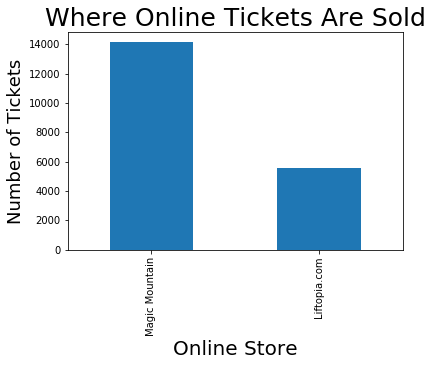

In [224]:
# View the different types of stores
df['store'].value_counts().plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Online Store", fontsize=20)
plt.title('Where Online Tickets Are Sold', fontsize=25)
plt.show()
# Or like this:
#df.groupby('store').size().plot(kind='bar')

***About three quarters of online business comes directly from the mountain***

In [225]:
# Look at the different possible products
df['product'].value_counts()

Magic Mountain | 1 Day Lift Tickets                                          14651
Magic Mountain | 2 Day Lift Tickets                                           1915
Magic Mountain | 1 Day Lift Ticket + Rental                                   1170
Magic Mountain | All Day Tubing                                                761
Magic Mountain | 3 Day Lift Tickets                                            417
Magic Mountain | 2 Day Lift Ticket + Rental                                    362
Magic Mountain | 1 Day Lift Ticket + Tubing                                    258
Magic Mountain | 3 Day Lift Ticket + Rental                                     45
Magic Mountain | Freedom 4-Pack 18/19                                           36
Magic Mountain | 2019/20 Freedom 4-Pack                                         36
Magic Mountain | Winter 19-20 Single Day Flexible Tickets | Valid Any Day       17
Magic Mountain | Winter 18-19 Single Day Flexible Tickets | Valid Any Day        9
Name

***Looks like single day lift tickets are far and away the most common.***

In [226]:
# Total number of rentals bought with tickets
rentals = df[(df['product'] == 'Magic Mountain | 1 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 2 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 3 Day Lift Ticket + Rental')].count()

In [227]:
# Rentals as a percent
print("Total percent of online rentals bought", 
      round(rentals['product']/len(df['product'])*100,2),'%')

Total percent of online rentals bought 8.01 %


In [228]:
# Check out Ticket Types
df['ticket_type'].value_counts()

Adult             13873
Youth / Senior     4976
All Ages            761
4-Pack               67
Name: ticket_type, dtype: int64

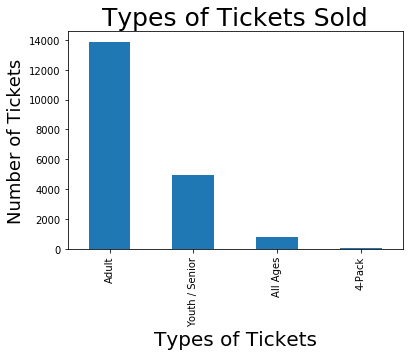

In [229]:
# Graph Ticket Types - looks like it's about 75% "Adult"
df['ticket_type'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Tickets", fontsize=20)
plt.title('Types of Tickets Sold', fontsize=25)
plt.show()

***I would love to have Youth and Senior broken up. Not sure why they even have an 'All
Ages' group. ***

## Ticket Time

#### Order Time

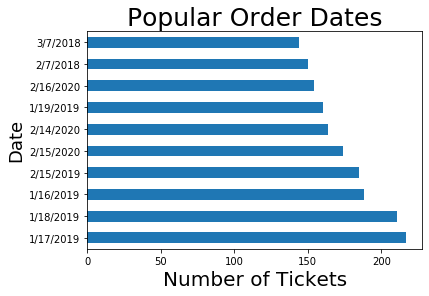

In [230]:
# When are people 'thinking' and 'planning' their ski trips?
df['order_date'].value_counts()[0:10].plot(kind='barh')
plt.ylabel("Date",fontsize=18)
plt.xlabel("Number of Tickets", fontsize=20)
plt.title('Popular Order Dates', fontsize=25)
plt.show()

***Looks like MLK Weekend, Presidents Day Weekend, Feburary Break - again, the resort
probably already knows what the busy weekends are going to be***

#### Trip Time

In [231]:
# Still not in datetime...
df['trip_date'].value_counts()

1/20/2019     472
2/15/2020     383
2/16/2020     357
1/19/2019     348
1/19/2020     344
             ... 
12/18/2016      2
12/17/2016      2
12/6/2016       2
3/30/2017       1
3/2/2017        1
Name: trip_date, Length: 298, dtype: int64

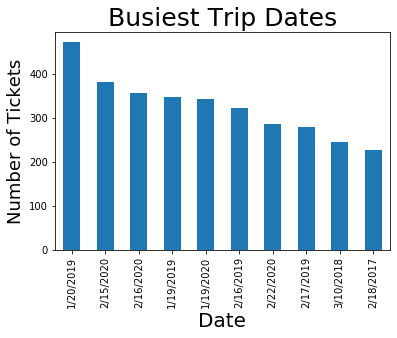

In [232]:
# What are the busiest dates?
df['trip_date'].value_counts()[0:10].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Date", fontsize=20)
plt.title('Busiest Trip Dates', fontsize=25)
plt.show()

***Looks pretty similar to when people are ordering tickets***

#### Order Trip Time Difference

In [233]:
# Change date types to datetime %Y-%m-%d
df['order_date'] = pd.to_datetime(df['order_date'])
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [234]:
# Check to see if it worked
df['trip_date'].head()

0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2017-02-16
Name: trip_date, dtype: datetime64[ns]

In [235]:
# Create new column with the difference between order date and ticket date
df['order_to_trip_days'] = (df['trip_date'] - df['order_date']).dt.days

In [236]:
# Look at these stats
df['order_to_trip_days'].describe()

count    19677.000000
mean         7.524928
std         16.735216
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        227.000000
Name: order_to_trip_days, dtype: float64

In [237]:
# Create a new df to play with
difference = df['order_to_trip_days']

In [238]:
# Look for three standard deviations above the mean
diff_outliers = difference.mean() + 3*difference.std()
# Count how many rows are outliers
print("Number of outliers:", (difference > diff_outliers).sum())
# Remove outliers from the data
difference = difference[difference < diff_outliers]
difference.describe()

Number of outliers: 492


count    19185.000000
mean         5.315559
std          8.102662
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         57.000000
Name: order_to_trip_days, dtype: float64

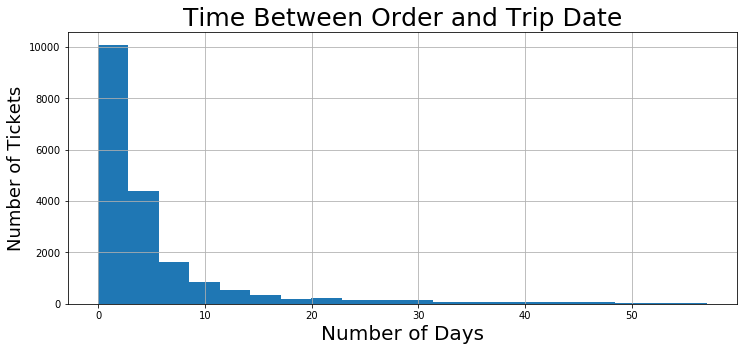

In [239]:
# Looks like most people buy tickets 1 or 2 days before they go skiing.
difference.hist(figsize =(12,5), bins=20)
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

***So most people order their tickets a day or two before - probably depending on the 
amount of snowfall and conditions***

In [240]:
# Perhaps I need to look at the difference of Liftopia vs Magic?

In [241]:
df.groupby('store')['order_to_trip_days'].nunique()

store
Liftopia.com      103
Magic Mountain    126
Name: order_to_trip_days, dtype: int64

In [242]:
# Create a new df to play with
store_diff = df[['order_to_trip_days', 'store']]
store_diff

order_to_trip_days           store
0                      50  Magic Mountain
1                      50  Magic Mountain
2                      50  Magic Mountain
3                      50  Magic Mountain
4                      93    Liftopia.com
...                   ...             ...
20505                   1    Liftopia.com
20506                   1    Liftopia.com
20507                   1    Liftopia.com
20508                   1  Magic Mountain
20509                   1  Magic Mountain

[19677 rows x 2 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd22d5860>,
      dtype=object)

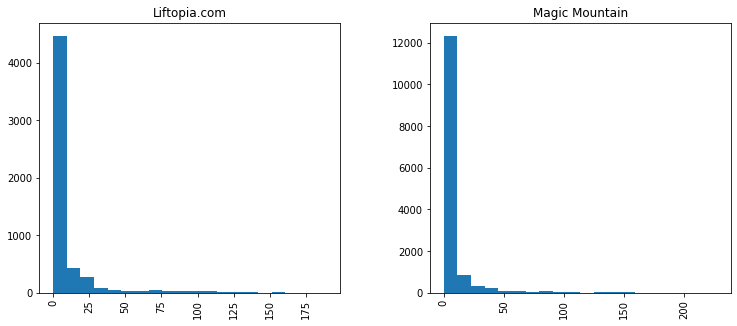

In [243]:
store_diff.hist(column='order_to_trip_days', by='store', figsize =(12,5), bins=20)

In [244]:
# Trying to get rid of the outliers!!!

In [245]:
store_diff_outliers = (store_diff['order_to_trip_days'].mean() + 
                       3*store_diff['order_to_trip_days'].std())
store_diff_outliers

57.73057460998671

In [251]:
store_diff['order_to_trip_days'] = store_diff['order_to_trip_days'][store_diff['order_to_trip_days'] <= store_diff_outliers]

/Users/whipxach/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [252]:
store_diff['order_to_trip_days'].mean()

5.315559030492572

In [253]:
store_diff['order_to_trip_days'].max()

57.0

In [254]:
x = store_diff[store_diff['store']=="Magic Mountain"]
y = store_diff[store_diff['store']=="Liftopia.com"]

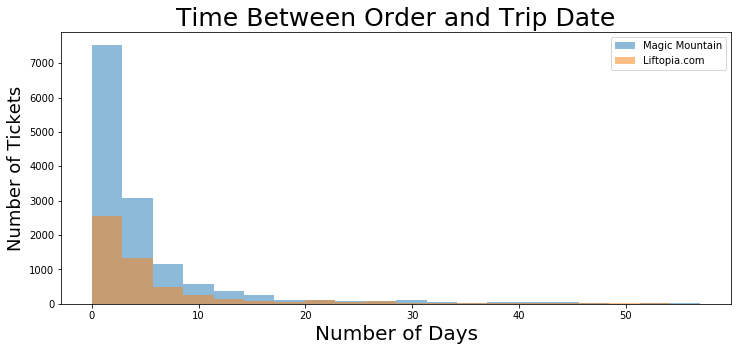

In [255]:
plt.figure(figsize=(12,5))
plt.hist(x['order_to_trip_days'], bins=20, alpha=0.5, label='Magic Mountain')
plt.hist(y['order_to_trip_days'], bins=20, alpha=0.5, label='Liftopia.com')
plt.legend(loc='upper right')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

## Zip Code Cleaning

In [256]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/
latlong_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
latlong_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [257]:
# I just want the zipcodes and the lat/lon
latlong_codes = latlong_codes.filter(['primary_city', 'state', 'zip','latitude', 'longitude'], axis=1)
latlong_codes.head()

primary_city state  zip  latitude  longitude
0   Holtsville    NY  501     40.81     -73.04
1   Holtsville    NY  544     40.81     -73.04
2     Adjuntas    PR  601     18.16     -66.72
3       Aguada    PR  602     18.38     -67.18
4    Aguadilla    PR  603     18.43     -67.15

In [258]:
df.purchaser_city.describe()

count        19675
unique        2514
top       New York
freq           466
Name: purchaser_city, dtype: object

In [259]:
latlong_codes.primary_city.describe()

count     42632
unique    18759
top         Apo
freq        373
Name: primary_city, dtype: object

In [268]:
skier_zip = pd.merge(df, latlong_codes,  how='left', left_on=['purchaser_city','purchaser_state'], right_on = ['primary_city','state'])
skier_zip.head()

order_status                              product     ticket_type  \
0    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
1    CANCELLED  Magic Mountain | 2 Day Lift Tickets           Adult   
2    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
3    CANCELLED  Magic Mountain | 2 Day Lift Tickets           Adult   
4         PAID  Magic Mountain | 1 Day Lift Tickets           Adult   

            store order_date  trip_date marketing_opt_in    purchaser_address  \
0  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
1  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
2  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
3  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
4    Liftopia.com 2016-11-15 2017-02-16               No                  NaN   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
0        Clinton              CT          6413                US   
1        Clinton              CT          6413                US   
2        Clinton              CT          6413                US   
3        Clinton              CT          6413                US   
4       Guilford              VT          5301                US   

   net_rate_revenue currency  order_to_trip_days primary_city state     zip  \
0             50.21      USD                  50      Clinton    CT  6413.0   
1             69.74      USD                  50      Clinton    CT  6413.0   
2             50.21      USD                  50      Clinton    CT  6413.0   
3             69.74      USD                  50      Clinton    CT  6413.0   
4             19.54      USD                  93          NaN   NaN     NaN   

   latitude  longitude  
0     41.27     -72.53  
1     41.27     -72.53  
2     41.27     -72.53  
3     41.27     -72.53  
4       NaN        NaN

In [270]:
skier_zip.shape

(174123, 20)

In [260]:
# Merge the lat and lon with my original dataframe
skier_zip = df.merge(latlong_codes, left_on='purchaser_city', right_on='primary_city')
skier_zip.head()

order_status                              product     ticket_type  \
0    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
1    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
2    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
3    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
4    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   

            store order_date  trip_date marketing_opt_in    purchaser_address  \
0  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
1  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
2  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
3  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
4  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
0        Clinton              CT          6413                US   
1        Clinton              CT          6413                US   
2        Clinton              CT          6413                US   
3        Clinton              CT          6413                US   
4        Clinton              CT          6413                US   

   net_rate_revenue currency  order_to_trip_days primary_city state    zip  \
0             50.21      USD                  50      Clinton    MA   1510   
1             50.21      USD                  50      Clinton    ME   4927   
2             50.21      USD                  50      Clinton    CT   6413   
3             50.21      USD                  50      Clinton    NJ   8809   
4             50.21      USD                  50      Clinton    NY  13323   

   latitude  longitude  
0     42.41     -71.68  
1     44.63     -69.50  
2     41.27     -72.53  
3     40.63     -74.91  
4     43.04     -75.37

In [261]:
skier_zip.shape

(290601, 20)

In [262]:
skier_zip = pd.concat([df, latlong_codes], axis=1, join='inner')

In [263]:
skier_zip.shape

(19677, 20)

In [264]:
skier_zip.head()

order_status                              product     ticket_type  \
0    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
1    CANCELLED  Magic Mountain | 2 Day Lift Tickets           Adult   
2    CANCELLED  Magic Mountain | 2 Day Lift Tickets  Youth / Senior   
3    CANCELLED  Magic Mountain | 2 Day Lift Tickets           Adult   
4         PAID  Magic Mountain | 1 Day Lift Tickets           Adult   

            store order_date  trip_date marketing_opt_in    purchaser_address  \
0  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
1  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
2  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
3  Magic Mountain 2016-11-11 2016-12-31              Yes  23 Jefferson Circle   
4    Liftopia.com 2016-11-15 2017-02-16               No                  NaN   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
0        Clinton              CT          6413                US   
1        Clinton              CT          6413                US   
2        Clinton              CT          6413                US   
3        Clinton              CT          6413                US   
4       Guilford              VT          5301                US   

   net_rate_revenue currency  order_to_trip_days primary_city state  zip  \
0             50.21      USD                  50   Holtsville    NY  501   
1             69.74      USD                  50   Holtsville    NY  544   
2             50.21      USD                  50     Adjuntas    PR  601   
3             69.74      USD                  50       Aguada    PR  602   
4             19.54      USD                  93    Aguadilla    PR  603   

   latitude  longitude  
0     40.81     -73.04  
1     40.81     -73.04  
2     18.16     -66.72  
3     18.38     -67.18  
4     18.43     -67.15

In [265]:
# Get rid of the unnecessary categorical columns
skier_zip = skier_zip.drop(['order_status', 'marketing_opt_in', 'purchaser_country',
                              'currency'], axis=1)

In [267]:
skier_zip.tail()

product     ticket_type           store  \
20505  Magic Mountain | 1 Day Lift Tickets           Adult    Liftopia.com   
20506  Magic Mountain | 1 Day Lift Tickets  Youth / Senior    Liftopia.com   
20507  Magic Mountain | 1 Day Lift Tickets  Youth / Senior    Liftopia.com   
20508  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
20509  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   

      order_date  trip_date purchaser_address purchaser_city purchaser_state  \
20505 2020-03-14 2020-03-15               NaN    Broad Brook              CT   
20506 2020-03-14 2020-03-15               NaN    Broad Brook              CT   
20507 2020-03-14 2020-03-15               NaN    Broad Brook              CT   
20508 2020-03-14 2020-03-15       38 belle ln            lee              NH   
20509 2020-03-14 2020-03-15       38 belle ln            lee              NH   

      purchaser_zip  net_rate_revenue  order_to_trip_days primary_city state  \
20505          6016             46.74                   1    Lexington    IN   
20506          6016             38.24                   1  Little York    IN   
20507          6016             38.24                   1      Marengo    IN   
20508          3861             51.14                   1   Marysville    IN   
20509          3861             51.14                   1    Mauckport    IN   

         zip  latitude  longitude  
20505  47138     38.65     -85.61  
20506  47139     38.69     -85.90  
20507  47140     38.37     -86.34  
20508  47141     38.58     -85.65  
20509  47142     38.02     -86.20

## Distance from Resort

In [147]:
coords_1 = (43.192778, -72.76)
distance = []
for i in range(len(skier_zip)):
    coords_2 = (skier_zip.latitude[i], skier_zip.longitude[i])
    miles = geopy.distance.distance(coords_1, coords_2).miles
    distance.append(miles)

In [148]:
skier_zip['Miles to Resort'] = distance

In [149]:
skier_zip.tail()

order_id                              product     ticket_type  \
290596  14285522.0  Magic Mountain | 1 Day Lift Tickets           Adult   
290597  14285522.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   
290598  14285876.0  Magic Mountain | 1 Day Lift Tickets           Adult   
290599  14285876.0  Magic Mountain | 1 Day Lift Tickets           Adult   
290600  14285876.0  Magic Mountain | 1 Day Lift Tickets           Adult   

                 store order_date  trip_date purchaser_address  \
290596    Liftopia.com 2020-03-14 2020-03-15               NaN   
290597    Liftopia.com 2020-03-14 2020-03-15               NaN   
290598  Magic Mountain 2020-03-14 2020-03-15     1752 18th st.   
290599  Magic Mountain 2020-03-14 2020-03-15     1752 18th st.   
290600  Magic Mountain 2020-03-14 2020-03-15     1752 18th st.   

        purchaser_city purchaser_state purchaser_zip  net_rate_revenue  \
290596   Safety Harbor              FL         34695             46.74   
290597   Safety Harbor              FL         34695             38.24   
290598  Cuyahoga Falls              OH         44223             51.14   
290599  Cuyahoga Falls              OH         44223             51.14   
290600  Cuyahoga Falls              OH         44223             51.14   

        order_to_trip_days    primary_city state    zip  latitude  longitude  \
290596                   1   Safety Harbor    FL  34695     28.00     -82.69   
290597                   1   Safety Harbor    FL  34695     28.00     -82.69   
290598                   1  Cuyahoga Falls    OH  44221     41.14     -81.48   
290599                   1  Cuyahoga Falls    OH  44222     41.16     -81.52   
290600                   1  Cuyahoga Falls    OH  44223     41.16     -81.52   

        Miles to Resort  
290596      1185.262096  
290597      1185.262096  
290598       469.360557  
290599       470.836891  
290600       470.836891

### Zip Code Map

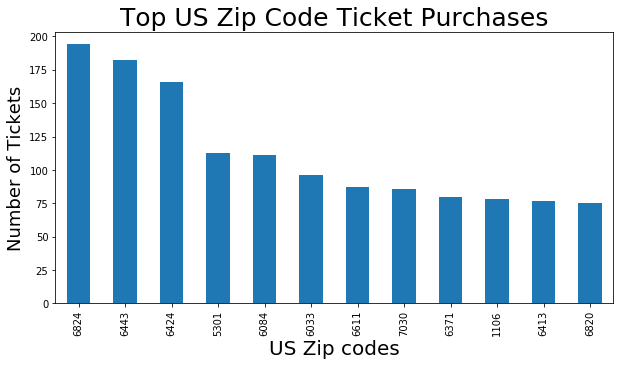

In [69]:
# Top ten zip codes where skiiers come from
skier_zip['zip'].value_counts()[:12].plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("US Zip codes", fontsize=20)
plt.title('Top US Zip Code Ticket Purchases', fontsize=25)
plt.show()

***Most of these zip codes are in Conneticut, Mass, and New York***

#### All Unique Zip Code Map

In [91]:
# Create a new df with unique zip codes
df_zip = skier_zip.drop_duplicates(subset='purchaser_zip')

In [92]:
# How many different zip codes are there
df_zip.shape

(2387, 19)

In [93]:
# Find out where these zip codes are located
map_zipcodes = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_zipcodes)

# Location by Zip code
for lat, lon in zip(df_zip['latitude'], df_zip['longitude']):
     folium.CircleMarker([lat, lon], radius=2, color='crimson',
    fill=False).add_to(map_zipcodes)

map_zipcodes

***I like this map showing all four years of where skiiers visited from. Unfortunately, it
is mostly just based on major metro areas***

#### Heat Map

In [94]:
# Trying to look at a heat map of purchases based on zip code

# Find out where these zip codes are located
map_heat = folium.Map([42.3232, -72.6547],zoom_start=8, 
                    width=800,height=500)

# Fun Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_heat)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skier_zip[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = skier_zip[['latitude', 'longitude']].values

# plot heatmap
map_heat .add_child(plugins.HeatMap(zipArr, radius=15))

map_heat 

***This map again shows lots of major cities where skiiers came from but has better detail
compared to the map above***

#### Yearly Map

In [95]:
# Looking for ways to differentiate the years

In [96]:
# Create a new df with unique zip codes for 2017
date_range = (skier_zip['trip_date'] > '2016-10-1') & (skier_zip['trip_date'] <= '2017-4-9')
skiers_2017 = skier_zip.loc[date_range]
skiers_2017_zipcodes = skiers_2017.drop_duplicates(subset='purchaser_zip')
skiers_2017_zipcodes.shape

(776, 19)

In [97]:
skiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [98]:
# Create a new df with unique zip codes for 2018
date_range = (skier_zip['trip_date'] > '2017-10-1') & (skier_zip['trip_date'] <= '2018-4-8')
skiers_2018 = skier_zip.loc[date_range]
skiers_2018_zipcodes = skiers_2018.drop_duplicates(subset='purchaser_zip')
skiers_2018_zipcodes.shape

(1157, 19)

In [99]:
# Create a new df with unique zip codes for 2019
date_range = (skier_zip['trip_date'] > '2018-10-1') & (skier_zip['trip_date'] <= '2019-4-7')
skiers_2019 = skier_zip.loc[date_range]
skiers_2019_zipcodes = skiers_2019.drop_duplicates(subset='purchaser_zip')
skiers_2019_zipcodes.shape

(1341, 19)

In [100]:
# Create a new df with unique zip codes for 2020
date_range = (skier_zip['trip_date'] > '2019-10-1') & (skier_zip['trip_date'] <= '2020-3-15')
skiers_2020 = skier_zip.loc[date_range]
skiers_2020_zipcodes = skiers_2020.drop_duplicates(subset='purchaser_zip')
skiers_2020_zipcodes.shape

(1316, 19)

In [101]:
# Create map of data by year
# How can I filter it by year?

# Map by year overlapping
map_yearly = folium.Map([42.5879, -72.5994],zoom_start=8, 
                    width=800,height=600)

# Fun Ski Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_yearly)

# Location by Zip code
for lat, lon in zip(skiers_2017_zipcodes['latitude'], skiers_2017_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=5, color='lightblue',
    fill=False).add_to(map_yearly)
        
for lat, lon in zip(skiers_2018_zipcodes['latitude'], skiers_2018_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=7, color='blue',
    fill=False).add_to(map_yearly)        

for lat, lon in zip(skiers_2019_zipcodes['latitude'], skiers_2019_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=9, color='darkblue',
    fill=False).add_to(map_yearly) 
    
# Won't load with all four years.      
#for lat, lon in zip(skiers_2020_zipcodes['latitude'], skiers_2020_zipcodes['longitude']):
#    folium.CircleMarker([lat, lon], radius=2, color='orange',
#    fill=False).add_to(map_yearly)    
        
map_yearly

***The darker the blue, the more recently skiiers visited.***

#### Clustered Map

In [102]:
from folium import plugins
from folium.plugins import MarkerCluster

# Find out where these zip codes are located
map_cluster = folium.Map([40.7128, -74.0060], zoom_start=6, 
                         width=700, height=500)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_cluster)

# Old method is depreciated, use this now
zipArr = df_zip[['latitude', 'longitude']].values

# plot cluster
map_cluster.add_child(plugins.MarkerCluster(zipArr, radius=15))

map_cluster

***This map allows the user to zoom in on an area in order to better view the number
of visitors from that area over the four years as well as the boundary***

#### State Map - And Revenue?

In [103]:
skiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [104]:
skiers_2017_zipcodes.purchaser_state.unique()

array(['CT', 'VT', 'PA', 'NJ', 'NY', 'MA', 'FL', 'MT', 'CA', 'NH', 'RI',
       'CO', 'NE', 'ID', 'VA', 'Other', 'NC', nan, 'MD', 'DE', 'AZ', 'OH',
       'IN', 'LA', 'ME', 'TX', 'MI', 'OR', 'GA'], dtype=object)

In [105]:
# Still working on this map...
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'


state_map = folium.Map(location=[40.9072, -76.5369], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=skiers_2017_zipcodes,
    columns=['purchaser_state', 'net_rate_revenue'],
    #key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Skiier Revenue By State'
).add_to(state_map)

folium.LayerControl().add_to(state_map)

state_map

#### County Map

In [106]:
# from http://eric.clst.org/Stuff/USGeoJSON
county_map = pd.read_json("gz_2010_us_050_00_5m.json")

In [107]:
county_map.head()

type                                           features
0  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
1  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
2  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
3  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
4  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...

In [108]:
county_map.features[1]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US02270',
  'STATE': '02',
  'COUNTY': '270',
  'NAME': 'Wade Hampton',
  'LSAD': 'CA',
  'CENSUSAREA': 17081.433},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-162.587754, 63.275727],
    [-162.55188, 63.271765],
    [-162.37771, 63.272891],
    [-162.374087, 63.186423],
    [-162.184665, 63.186448],
    [-162.177514, 63.096467],
    [-161.990032, 63.096024],
    [-161.990906, 63.012675],
    [-161.140321, 63.013095],
    [-160.851144, 63.012689],
    [-160.851557, 62.998939],
    [-160.941899, 62.998883],
    [-160.942287, 62.898827],
    [-160.993241, 62.897962],
    [-161.000397, 62.551764],
    [-161.04528, 62.550449],
    [-161.047821, 62.206673],
    [-160.910169, 62.204383],
    [-160.913973, 61.949378],
    [-160.534142, 61.947257],
    [-160.528204, 61.92644],
    [-160.502057, 61.892448],
    [-160.469477, 61.869348],
    [-160.397691, 61.851223],
    [-160.321954, 61.846512],
    [-160.247172, 61.856013],
    [-

In [109]:
county_map.features[1]['properties']['STATE']

'02'

In [110]:
# Create map
map_1 = folium.Map(location=[40.7128, -74.0060], zoom_start=7)

map_1

In [111]:
# Still trying to sort through this map...
"""
# Add choropleth layer
folium.Choropleth(
 geo_data=county_map,
 name='choropleth',
 data=skiers_2017_zipcodes,
 columns=['order_id', 'net_rate_revenue'],
 key_on='properties.GEO_ID',
 fill_color='YlGnBu',
 fill_opacity=0.8,
 line_opacity=0.05,
 legend_name='Percentage Foreigners(%)',
 bins=[0, 5, 10, 15, 20, 25]
).add_to(map_1)

folium.LayerControl().add_to(map_1)
"""

"\n# Add choropleth layer\nfolium.Choropleth(\n geo_data=county_map,\n name='choropleth',\n data=skiers_2017_zipcodes,\n columns=['order_id', 'net_rate_revenue'],\n key_on='properties.GEO_ID',\n fill_color='YlGnBu',\n fill_opacity=0.8,\n line_opacity=0.05,\n legend_name='Percentage Foreigners(%)',\n bins=[0, 5, 10, 15, 20, 25]\n).add_to(map_1)\n\nfolium.LayerControl().add_to(map_1)\n"

In [112]:
# This is the original
"""
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m
"""

"\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\nstate_geo = f'{url}/us-states.json'\nstate_unemployment = f'{url}/US_Unemployment_Oct2012.csv'\nstate_data = pd.read_csv(state_unemployment)\n\nm = folium.Map(location=[48, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=state_geo,\n    name='choropleth',\n    data=state_data,\n    columns=['State', 'Unemployment'],\n    key_on='feature.id',\n    fill_color='YlGn',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Unemployment Rate (%)'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)\n\nm\n"

In [113]:
"""
import branca


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)


m
"""

"\nimport branca\n\n\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\ncounty_data = f'{url}/us_county_data.csv'\ncounty_geo = f'{url}/us_counties_20m_topo.json'\n\n\ndf = pd.read_csv(county_data, na_values=[' '])\n\ncolorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)\nemployed_series = df.set_index('FIPS_Code')['Employed_2011']\n\n\ndef style_function(feature):\n    employed = employed_series.get(int(feature['id'][-5:]), None)\n    return {\n        'fillOpacity': 0.5,\n        'weight': 0,\n        'fillColor': '#black' if employed is None else colorscale(employed)\n    }\n\n\nm = folium.Map(\n    location=[48, -102],\n    tiles='cartodbpositron',\n    zoom_start=3\n)\n\nfolium.TopoJson(\n    json.loads(requests.get(county_geo).text),\n    'objects.us_counties_20m',\n    style_function=style_function\n).add_to(m)\n\n\nm\n"

## Addresses

#### By city

In [176]:
# Trying to look at the different cities
df['purchaser_city'].value_counts()

New York           466
Brooklyn           379
Fairfield          241
Boston             178
Madison            175
                  ... 
Mount Wolf           1
Hampton Bays         1
North Billerica      1
BABYLON              1
Bedford hills        1
Name: purchaser_city, Length: 2514, dtype: int64

In [177]:
# Many of the Cities aren't capitalized
df['purchaser_city'] = df['purchaser_city'].str.title()

In [178]:
# This looks better
df['purchaser_city'].value_counts()

New York         508
Brooklyn         453
Fairfield        281
Madison          202
Boston           192
                ... 
Hillsboro          1
Northvale          1
Los Alamos         1
Hopewell Jct.      1
Bingamton          1
Name: purchaser_city, Length: 1921, dtype: int64

#### By state

In [117]:
# Since zip codes are sort of hard to understand let's look at states
df.purchaser_state.value_counts().head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

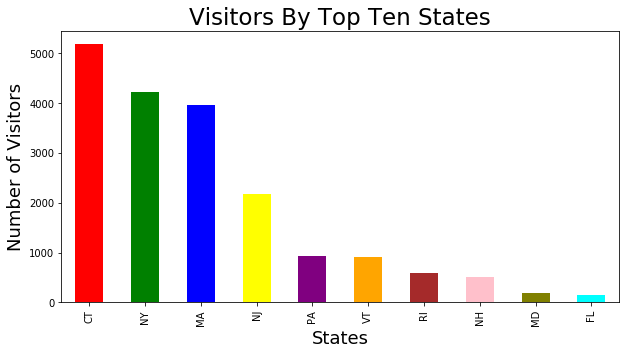

In [118]:
# Sometimes bar graphs are easier to read.
my_colors = list(['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown',
                  'pink', 'olive', 'cyan'])  
df.purchaser_state.value_counts()[0:10].plot(kind='bar',color=my_colors, 
                                             figsize=(10,5))
plt.xlabel("States", fontsize=18)
plt.ylabel("Number of Visitors",fontsize=18)
plt.title('Visitors By Top Ten States', fontsize=23)
plt.show()

In [119]:
# Looks like almost all fifty states visit Magic!
df.purchaser_state.value_counts().count()

48

In [120]:
# There are a lot of missing values...
df.purchaser_state.isnull().sum()

64

In [121]:
#pip install pywaffle

In [122]:
state_numbers = df.purchaser_state.value_counts()[0:10]

In [123]:
state_numbers.head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

In [124]:
state_numbers.sum()

18820

In [125]:
state_numbers.sum()/188.72

99.72445951674439

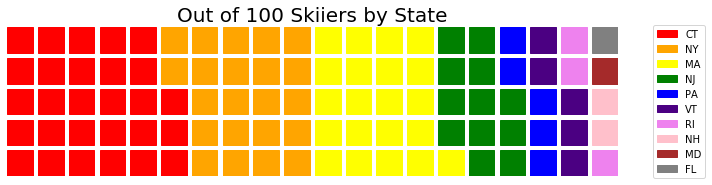

In [126]:
# Waffle Chart out of 100
fig = plt.figure(FigureClass = Waffle, rows=5, values = list(state_numbers.values/188.72), 
                 labels=list(state_numbers.index), figsize=(10,5), 
                 colors=('red', 'orange', 'yellow', 'green', 'blue','indigo',
                         'violet', 'pink', 'brown', 'gray'), 
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1.05)},
                 title= {'label': 'Out of 100 Skiiers by State', 'size': 20})

***Here is a fun way to show the number of skiiers by the top states***

In [131]:
# Which ones are missing values?
df_skiers[df_skiers.purchaser_state.isnull()].head()

order_id                              product     ticket_type  \
1022  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1023  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1562  12187666.0  Magic Mountain | 1 Day Lift Tickets           Adult   
1598  13694677.0  Magic Mountain | 1 Day Lift Tickets           Adult   
3455  13697167.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   

               store order_date  trip_date     purchaser_address  \
1022  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1023  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1562  Magic Mountain 2019-01-19 2019-01-20         343 Sperry Rd   
1598    Liftopia.com 2020-01-24 2020-01-25                   NaN   
3455  Magic Mountain 2020-01-24 2020-01-25        105 East Court   

     purchaser_city purchaser_state  purchaser_zip  net_rate_revenue  \
1022       Brooklyn             NaN          11211            117.17   
1023       Brooklyn             NaN          11211            117.17   
1562        Bethany             NaN           6524             68.82   
1598     Brookfield             NaN           6804             50.99   
3455   Wading River             NaN          11792             41.84   

      order_to_trip_days    zip  primary_city state  latitude  longitude  
1022                   1  11211      Brooklyn    NY     40.71     -73.95  
1023                   1  11211      Brooklyn    NY     40.71     -73.95  
1562                   1   6524       Bethany    CT     41.42     -72.99  
1598                   1   6804    Brookfield    CT     41.46     -73.39  
3455                   1  11792  Wading River    NY     40.94     -72.81

In [132]:
# Use the state data from other dataset to fill Nan's
df.purchaser_state.fillna(df_skiers.state, inplace=True)

In [133]:
# Not sure why it didn't work on all of them
df.purchaser_state.isnull().sum()

6

In [134]:
# Can't figure out why these didn't fill
df[df.purchaser_state.isnull()]

order_id order_status                              product  \
19808  14136994.0         PAID      Magic Mountain | All Day Tubing   
20039  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20040  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20041  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20285  14220109.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20346  14235476.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19808        All Ages  Magic Mountain 2020-02-26 2020-02-29               No   
20039           Adult  Magic Mountain 2020-03-01 2020-03-06               No   
20040  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20041  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20285           Adult  Magic Mountain 2020-03-06 2020-03-07               No   
20346           Adult  Magic Mountain 2020-03-07 2020-03-08               No   

            purchaser_address purchaser_city purchaser_state  purchaser_zip  \
19808          63 Pleasant St       Winthrop             NaN           2152   
20039     7 Driftway Point Rd        Danbury             NaN           6811   
20040     7 Driftway Point Rd        Danbury             NaN           6811   
20041     7 Driftway Point Rd        Danbury             NaN           6811   
20285  2754 S Linebarger Terr      Milwaukee             NaN          53207   
20346     150 Furnace Hill Rd       Cheshire             NaN           1225   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
19808                US             23.24      USD                   3  
20039                US             42.77      USD                   5  
20040                US             26.03      USD                   5  
20041                US             27.89      USD                   5  
20285                US             57.65      USD                   1  
20346                US             53.00      USD                   1

#### By address

In [135]:
# Missing a lot of data here... Maybe Liftopia doesn't require an address?
df.purchaser_address.count()

14111

In [136]:
# Look at 'store'
df.store.value_counts()

Magic Mountain    14113
Liftopia.com       5559
Name: store, dtype: int64

In [137]:
# Are these repeat buyers or are they group purchases?
df.purchaser_address.value_counts()

733 PROSPECT ST            33
8 Kane Road                28
136 Rhodes Road            25
456 Jones Hollow Road      23
209 old kings hwy North    22
                           ..
10 Boisenberry Lane         1
123 ainslie street          1
78 N. Pine Avenue           1
36 main street #15          1
145 Forest Home Dr.         1
Name: purchaser_address, Length: 5802, dtype: int64

In [138]:
# Looks like most addresses have two purchases
df.purchaser_address.value_counts().median()

2.0

In [139]:
# Look at the mean as well
df.purchaser_address.value_counts().mean()

2.432092381937263

In [140]:
# This is one of the address with multiple purchases
df.loc[df.purchaser_address == "733 PROSPECT ST"]

order_id order_status                                      product  \
8902   11985146.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9597   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9598   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9599   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9600   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9601   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
11286  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11287  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11288  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11289  12307949.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12123  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12124  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12125  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13178  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13179  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13182  12555015.0         PAID  Magic Mountain | 1 Day Lift Ticket + Tubing   
16884  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16885  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16886  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16887  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16888  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17583  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17584  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17585  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17586  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17587  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18261  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18262  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20100  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20101  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20102  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20103  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20104  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
8902            Adult  Magic Mountain 2018-12-29 2018-12-31              Yes   
9597            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9598            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9599            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9600            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9601   Youth / Senior  Magic Mountain 2019-01-13 2019-01-27              Yes   
11286           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11287           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11288  Youth / Senior  Magic Mountain 2019-02-01 2019-02-09              Yes   
11289           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
12123           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12124           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12125  Youth / Senior  Magic Mountain 2019-02-15 2019-02-19              Yes   
13178           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13179           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13182  Youth / Senior  Magic Mountain 2019

In [141]:
df.loc[df.purchaser_address == "8 Kane Road"]

order_id order_status                                      product  \
3107   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3108   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3109   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3110   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3111   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3112   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3113   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3114   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3115   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3116   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3117   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3118   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
5271   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5272   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5273   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5274   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5275   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5276   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15595  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15596  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15597  13301954.0         PAID              Magic Mountain | All Day Tubing   
15598  13301954.0         PAID              Magic Mountain | All Day Tubing   
15599  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15600  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15601  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15602  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15603  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15604  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
3107            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3108            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3109   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3110   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3111   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3112   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3113            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3114            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3115   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3116   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3117   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3118   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
5271            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5272            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5273   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5274   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5275   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5276   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
15595           Adult  Magic Mountain 2019-12-28 2019-12-30              Yes   
15596  Youth / Senior  Magic Mountain 2019-12-28 2019-12-30              Yes   
15597        All Ages  Magic Mountain

In [142]:
df.loc[df.purchaser_address == "136 Rhodes Road"]

order_id order_status                              product  \
968   10505969.0         PAID  Magic Mountain | 1 Day Lift Tickets   
4801  11290278.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5052  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5053  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5054  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5055  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5676  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5677  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6189  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6190  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6191  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6192  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6834  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6835  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6836  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6837  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7208  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7209  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7210  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7211  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7212  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7438  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7439  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7527  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7528  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   

         ticket_type           store order_date  trip_date marketing_opt_in  \
968            Adult  Magic Mountain 2017-02-09 2017-02-10              Yes   
4801           Adult  Magic Mountain 2018-02-06 2018-02-08              Yes   
5052           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5053           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5054  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5055  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5676           Adult  Magic Mountain 2018-03-02 2018-03-03              Yes   
5677  Youth / Senior  Magic Mountain 2018-03-02 2018-03-03              Yes   
6189           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6190           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6191  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6192  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6834           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6835           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6836  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
6837  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
7208           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7209           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7210           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7211  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7212  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7438           Adult  Magic Mountain 2018-03-30 2018-03-31              Yes   
7439  Youth / Senior  Magic Mountain 2018-03-30 2018-03-31              Yes   
7527           Adult  Magic Mountain 2018-04-05 2018-04-07              Yes   
7528  Youth / Senior  Magic Mountain 2018-04-05 2018-04-07              Yes   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
968    136 Rhodes Road        Tolland              CT       

#### Revenue

In [143]:
# Look at ticket sales
df.net_rate_revenue.describe()

count    19672.000000
mean        51.210320
std         23.840826
min          1.860000
25%         38.120000
50%         47.420000
75%         57.650000
max        261.320000
Name: net_rate_revenue, dtype: float64

In [144]:
# Break up the two stores into two df's
liftopia = df[df.store == 'Liftopia.com']

In [145]:
# Second df
magic = df[df.store == 'Magic Mountain']

In [146]:
# Tickets from 'Liftopia'
liftopia.net_rate_revenue.describe()

count    5559.000000
mean       45.559579
std        18.619888
min        13.590000
25%        34.840000
50%        43.340000
75%        50.990000
max       194.640000
Name: net_rate_revenue, dtype: float64

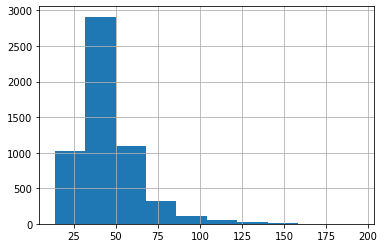

In [147]:
# Histogram of ticket prices
liftopia.net_rate_revenue.hist()

In [148]:
# Now for other df
magic.net_rate_revenue.describe()

count    14113.000000
mean        53.436102
std         25.262679
min          1.860000
25%         39.050000
50%         50.210000
75%         59.510000
max        261.320000
Name: net_rate_revenue, dtype: float64

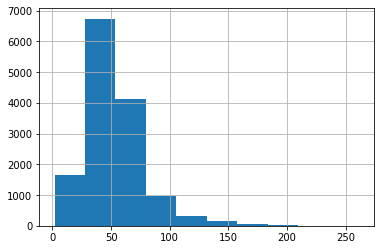

In [149]:
# The other store histogram
magic.net_rate_revenue.hist()

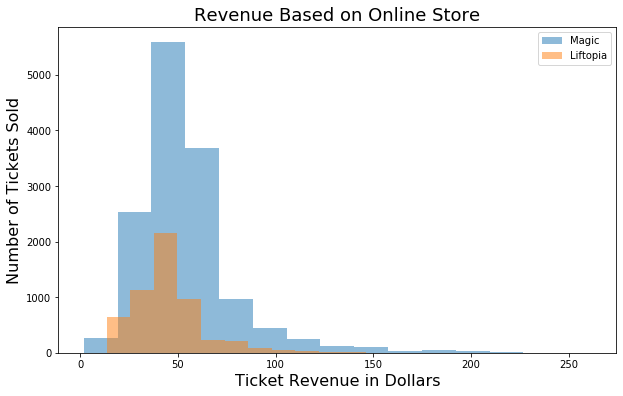

In [150]:
plt.figure(figsize=(10,6))
plt.hist(magic.net_rate_revenue, bins=15, alpha=0.5, label="Magic")
plt.hist(liftopia.net_rate_revenue, bins=15, alpha=0.5, label="Liftopia")
plt.xlabel("Ticket Revenue in Dollars", size=16)
plt.ylabel("Number of Tickets Sold", size=16)
plt.title("Revenue Based on Online Store", size=18)
plt.legend(loc='upper right')

***It makes sense that they make more money from their own online store instead of
the outside vendor***

## Sales By Year

In [151]:
# Trying to seperate by year - NOT WORKING!
#df['2017'] = df[df['trip_date'] == '2017']

In [152]:
years = [df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape]

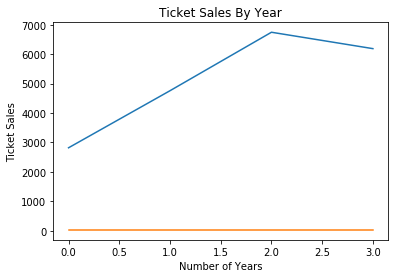

In [153]:
import matplotlib.pyplot as plt
plt.plot(years)
plt.xlabel('Number of Years')
plt.ylabel('Ticket Sales')
plt.title('Ticket Sales By Year')
plt.show()

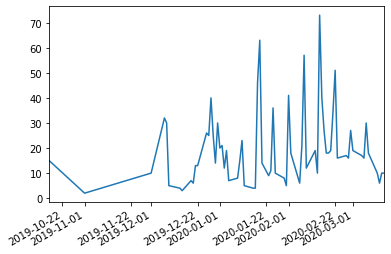

In [155]:
skiers_2020_zipcodes.trip_date.value_counts().plot()

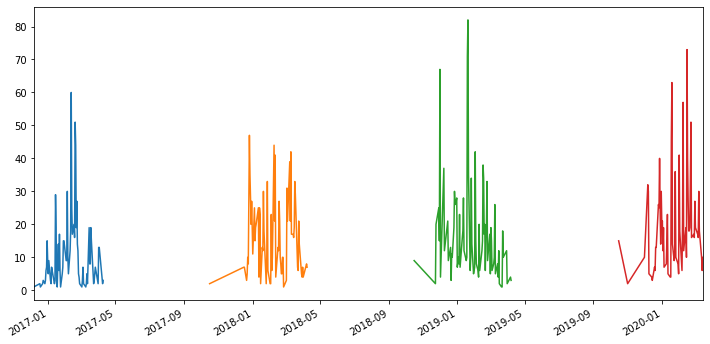

In [157]:
plt.figure(figsize=(12,6))
skiers_2017_zipcodes.trip_date.value_counts().plot()
skiers_2018_zipcodes.trip_date.value_counts().plot()
skiers_2019_zipcodes.trip_date.value_counts().plot()
skiers_2020_zipcodes.trip_date.value_counts().plot()

# Grouped by Address

I would group each order by address and make features like number of tickets purchases, number of adult tickets purchased, number of child tickets purchased, etc

## Groupby Repeat Ticket Type

In [158]:
skier_zip.tail()

order_id order_status                              product  \
19607  14266821.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19608  14285295.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19609  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19610  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19611  14285876.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19607           Adult  Magic Mountain 2020-03-11 2020-03-12              Yes   
19608           Adult  Magic Mountain 2020-03-14 2020-03-15               No   
19609           Adult    Liftopia.com 2020-03-14 2020-03-15               No   
19610  Youth / Senior    Liftopia.com 2020-03-14 2020-03-15               No   
19611           Adult  Magic Mountain 2020-03-14 2020-03-15               No   

       purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
19607       P.O. Box 367       Tyringham              MA           1264   
19608  429 Center Street      Zelienople              PA          16063   
19609                NaN   Safety Harbor              FL          34695   
19610                NaN   Safety Harbor              FL          34695   
19611      1752 18th st.  Cuyahoga Falls              OH          44223   

      purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
19607                US             26.03      USD                   1   1264   
19608                US             51.14      USD                   1  16063   
19609                US             46.74      USD                   1  34695   
19610                US             38.24      USD                   1  34695   
19611                US             51.14      USD                   1  44223   

       latitude  longitude  
19607     42.24     -73.19  
19608     40.78     -80.14  
19609     28.00     -82.69  
19610     28.00     -82.69  
19611     41.16     -81.52

In [159]:
all_customers = skier_zip.groupby('purchaser_address')['trip_date'].nunique()
all_customers = pd.DataFrame(all_customers)

In [160]:
all_customers.columns = ['Number of Trips']

In [161]:
all_customers.head()

Number of Trips
purchaser_address                           
!4 Cedar Terrace                           2
#433, 700 Bloomfield Avenue                1
08 woodmont rd                             1
1 Abington Road                            1
1 Andrew Circle                            1

In [162]:
skier_zip.groupby('purchaser_address')['net_rate_revenue'].mean()

purchaser_address
!4 Cedar Terrace               70.67
#433, 700 Bloomfield Avenue    60.44
08 woodmont rd                 82.76
1 Abington Road                41.84
1 Andrew Circle                52.07
                               ...  
po box 551                     33.16
po box 596                     59.51
po box 605                     55.79
po box 75                      62.30
po. box 507                    79.04
Name: net_rate_revenue, Length: 5780, dtype: float64

In [163]:
all_customers["Mean Revenue"] = skier_zip.groupby('purchaser_address')['net_rate_revenue'].mean()

In [164]:
all_customers.head()

Number of Trips  Mean Revenue
purchaser_address                                         
!4 Cedar Terrace                           2         70.67
#433, 700 Bloomfield Avenue                1         60.44
08 woodmont rd                             1         82.76
1 Abington Road                            1         41.84
1 Andrew Circle                            1         52.07

In [165]:
skier_zip.groupby('purchaser_address')['order_to_trip_days'].mean()

purchaser_address
!4 Cedar Terrace               2.000000
#433, 700 Bloomfield Avenue    1.000000
08 woodmont rd                 1.000000
1 Abington Road                5.000000
1 Andrew Circle                1.000000
                                 ...   
po box 551                     5.333333
po box 596                     3.000000
po box 605                     1.000000
po box 75                      1.000000
po. box 507                    1.000000
Name: order_to_trip_days, Length: 5780, dtype: float64

In [166]:
all_customers["Mean Order Time"] = skier_zip.groupby('purchaser_address')['order_to_trip_days'].mean()

In [167]:
all_customers['Adult Tickets'] = skier_zip[skier_zip['ticket_type'] =='Adult'].groupby('purchaser_address')['ticket_type'].count()

In [168]:
all_customers['Youth/Senior Tickets'] = skier_zip[skier_zip['ticket_type'] == 'Youth / Senior'].groupby('purchaser_address')['ticket_type'].count()

In [169]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         NaN                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [170]:
all_customers['Adult Tickets'] = all_customers['Adult Tickets'].fillna(0)

In [171]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [172]:
all_customers['Youth/Senior Tickets'] = all_customers['Youth/Senior Tickets'].fillna(0)

In [173]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   0.0  
#433, 700 Bloomfield Avenue            1.0                   0.0  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   0.0  
1 Andrew Circle                        4.0                   0.0

In [177]:
all_customers["Miles to Resort"] = skier_zip.groupby('purchaser_address')['Miles to Resort'].mean()

In [178]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  
purchaser_address                             
!4 Cedar Terrace                  216.871422  
#433, 700 Bloomfield Avenue        95.456885  
08 woodmont rd                    178.489755  
1 Abington Road                   250.364930  
1 Andrew Circle                    95.481157

In [179]:
all_customers.describe()

Number of Trips  Mean Revenue  Mean Order Time  Adult Tickets  \
count      5780.000000   5780.000000      5780.000000    5780.000000   
mean          1.244637     55.438150         6.213475       1.664879   
std           0.739942     24.855304        13.659577       1.397466   
min           1.000000     14.870000         0.000000       0.000000   
25%           1.000000     42.615000         1.000000       1.000000   
50%           1.000000     51.140000         2.000000       1.000000   
75%           1.000000     61.370000         5.000000       2.000000   
max          13.000000    261.320000       192.000000      25.000000   

       Youth/Senior Tickets  Miles to Resort  
count           5780.000000      5780.000000  
mean               0.635813       175.634039  
std                1.317839       262.965176  
min                0.000000         2.982793  
25%                0.000000        92.853950  
50%                0.000000       128.924797  
75%                1.000000       178.083874  
max               16.000000      4981.738462

# Models

## K Means Cluster

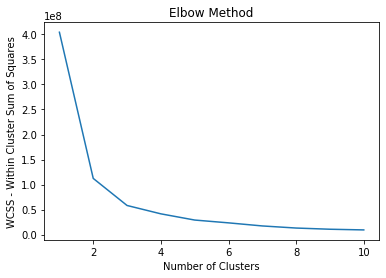

In [183]:
# Looking at the parms for k-means
wcss = []
for i in range(1, 11):
    kmeans_all_customers_model_1 = KMeans(n_clusters=i, init='k-means++', 
                                          max_iter=300, n_init=10, random_state=0)
    kmeans_all_customers_model_1.fit(all_customers)
    wcss.append( kmeans_all_customers_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.show()

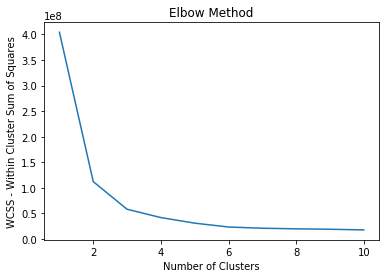

In [184]:
# not much difference
wcss = []
for i in range(1, 11):
    kmeans_all_customers_model_1 = KMeans(n_clusters=i, init='random', 
                                          max_iter=300, n_init=10, random_state=0)
    kmeans_all_customers_model_1.fit(all_customers)
    wcss.append( kmeans_all_customers_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.show()

In [185]:
all_customers.columns

Index(['Number of Trips', 'Mean Revenue', 'Mean Order Time', 'Adult Tickets',
       'Youth/Senior Tickets', 'Miles to Resort'],
      dtype='object')

In [186]:
# Initiate the model 
kmeans_all_customers_model_2 = KMeans(n_clusters=3)

y = kmeans_all_customers_model_2.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        1  
#433, 700 Bloomfield Avenue        95.456885        1  
08 woodmont rd                    178.489755        1  
1 Abington Road                   250.364930        1  
1 Andrew Circle                    95.481157        1

In [187]:
kmeans_model_clusters = all_customers.groupby('Cluster')

In [188]:
kmeans_model_clusters.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2      70.67000              2.0   
#433, 700 Bloomfield Avenue                1      60.44000              1.0   
08 woodmont rd                             1      82.76000              1.0   
1 Abington Road                            1      41.84000              5.0   
1 Andrew Circle                            1      52.07000              1.0   
1001 South Brown School Rd                 1     129.27000              1.0   
101 fairview                               1      39.98000             12.0   
10216 Thurston Groves Blvd                 1      52.07000              1.0   
1056 Gwyn circle                           1      65.09000              1.0   
10561 bandera mountain lane                1      53.93000              1.0   
106 Aline Street                           1      74.39000              1.0   
106 Chipola Road                           1      14.87000              1.0   
11437 S Dry Creek Rd                       1      45.09500              5.0   
1215 Arguello Blvd.                        1      38.12000              2.0   
1392 Nanialii St                           1      24.51875              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   
1001 South Brown School Rd             1.0                   0.0   
101 fairview                           2.0                   0.0   
10216 Thurston Groves Blvd             1.0                   0.0   
1056 Gwyn circle                       0.0                   2.0   
10561 bandera mountain lane            1.0                   0.0   
106 Aline Street                       1.0                   0.0   
106 Chipola Road                       0.0                   0.0   
11437 S Dry Creek Rd                   2.0                   0.0   
1215 Arguello Blvd.                    1.0                   0.0   
1392 Nanialii St                       0.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        1  
#433, 700 Bloomfield Avenue        95.456885        1  
08 woodmont rd                    178.489755        1  
1 Abington Road                   250.364930        1  
1 Andrew Circle                    95.481157        1  
1001 South Brown School Rd        634.873556        0  
101 fairview                     1737.692750        2  
10216 Thurston Groves Blvd       1194.986852        0  
1056 Gwyn circle                 1106.845158        0  
10561 bandera mountain lane      2297.548670        2  
106 Aline Street                 1390.148641        0  
106 Chipola Road                 1114.546199        0  
11437 S Dry Creek Rd             2006.583748        2  
1215 Arguello Blvd.              2607.640590        2  
1392 Nanialii St                 4981.738462        2

In [189]:
kmeans_all_customers_model_3 = KMeans(n_clusters=5)

y = kmeans_all_customers_model_3.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        0  
#433, 700 Bloomfield Avenue        95.456885        3  
08 woodmont rd                    178.489755        0  
1 Abington Road                   250.364930        0  
1 Andrew Circle                    95.481157        3

In [190]:
kmeans_all_customers_model_4 = KMeans(n_clusters=7)

y = kmeans_all_customers_model_4.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        3  
#433, 700 Bloomfield Avenue        95.456885        0  
08 woodmont rd                    178.489755        3  
1 Abington Road                   250.364930        3  
1 Andrew Circle                    95.481157        0

In [191]:
all_customers.Cluster.value_counts()

0    3574
3    1982
6      92
2      67
1      33
5      31
4       1
Name: Cluster, dtype: int64

In [192]:
all_customers.Cluster.unique()

array([3, 0, 6, 5, 2, 1, 4])

In [193]:
cluster_list = all_customers.Cluster.unique()

In [194]:
cluster_list

array([3, 0, 6, 5, 2, 1, 4])

In [195]:
cluster_list[0]

3

In [196]:
cluster_list = cluster_list.tolist()

In [197]:
type(cluster_list)

list

In [198]:
cluster_list.sort()

In [199]:
cluster_list

[0, 1, 2, 3, 4, 5, 6]

In [200]:
len(all_customers[all_customers['Cluster'] == 0])

3574

## Examining Cluster Function

In [201]:
def examine_clusters_again(df):
    rows_list = []
    cluster_list = df.Cluster.unique()
    cluster_list = cluster_list.tolist()
    cluster_list.sort()
    for i in cluster_list:
        cluster_group = df[df.Cluster == i]
        cluster_length = len(df[df['Cluster'] == i])
        trip_mean = cluster_group['Number of Trips'].mean()
        rev_mean = cluster_group['Mean Revenue'].mean()
        order_mean = cluster_group['Mean Order Time'].mean()
        adult_mean = cluster_group['Adult Tickets'].mean()
        youth_mean = cluster_group['Youth/Senior Tickets'].mean()
        miles_mean = cluster_group['Miles to Resort'].mean()
        dict1 = {'Cluster':i,
                 'Number of Visitors':cluster_length,
                 'Trips Mean':trip_mean,
                 'Revenue Mean':rev_mean,
                 'Order Mean':order_mean,
                 'Adult Tics Mean':adult_mean,
                 'Youth Tics Mean':youth_mean,
                 'Miles Away Mean':miles_mean}
        rows_list.append(dict1)
    cluster_df = pd.DataFrame(rows_list)   
    return cluster_df

In [202]:
examine_clusters_again(all_customers)

Cluster  Number of Visitors  Trips Mean  Revenue Mean  Order Mean  \
0        0                3574    1.269726     51.819858    4.948451   
1        1                  33    1.060606     66.686266    3.363636   
2        2                  67    1.194030     69.054985   12.242289   
3        3                1982    1.213421     60.920364    8.225507   
4        4                   1    1.000000     24.518750    1.000000   
5        5                  31    1.064516     57.925323    5.043011   
6        6                  92    1.108696     63.441724    9.093478   

   Adult Tics Mean  Youth Tics Mean  Miles Away Mean  
0         1.635422         0.658086        93.607618  
1         1.515152         0.181818      2506.178617  
2         1.567164         0.402985      1151.296335  
3         1.730071         0.627649       202.288373  
4         0.000000         0.000000      4981.738462  
5         1.580645         0.451613      1683.221823  
6         1.576087         0.347826       681.230455

In [203]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        3  
#433, 700 Bloomfield Avenue        95.456885        0  
08 woodmont rd                    178.489755        3  
1 Abington Road                   250.364930        3  
1 Andrew Circle                    95.481157        0

In [207]:
# What am I trying to do here?
#all_customers.groupby()

## Another Groupby

In [205]:
the_customers = skier_zip.groupby('purchaser_address')['trip_date'].nunique()
the_customers = pd.DataFrame(the_customers)

In [206]:
repeat_customers = the_customers[the_customers.trip_date > 1]

In [208]:
non_repeat_cust = the_customers[the_customers.trip_date <= 1]

In [209]:
repeat_customers.head()

trip_date
purchaser_address             
!4 Cedar Terrace             2
1 Astor Place                2
1 E. Welling Avenue          2
1 Edgehill Terrace           2
1 Fore River Ave             2

In [210]:
repeat_customers.describe()

trip_date
count  897.000000
mean     2.576366
std      1.195704
min      2.000000
25%      2.000000
50%      2.000000
75%      3.000000
max     13.000000

In [211]:
non_repeat_cust.head()

trip_date
purchaser_address                     
#433, 700 Bloomfield Avenue          1
08 woodmont rd                       1
1 Abington Road                      1
1 Andrew Circle                      1
1 Bentley Dr                         1

In [212]:
non_repeat_cust.describe()

trip_date
count     4883.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0

In [213]:
skier_zip.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  Miles to Resort  
0     41.27     -72.53        133.23436  
1     41.27     -72.53        133.23436  
2     41.27     -72.53        133.23436  
3     41.27     -72.53        133.23436  
4     41.27     -72.53        133.23436

## Groupby Youth

In [214]:
adult_tics = df[df['ticket_type'] =='Adult'].groupby('purchaser_address')['ticket_type'].count()
adult_tics = pd.DataFrame(adult_tics)
adult_tics.head()

ticket_type
purchaser_address                       
!4 Cedar Terrace                       4
#433, 700 Bloomfield Avenue            1
1 Abington Road                        1
1 Andrew Circle                        4
1 Astor Place                          3

In [215]:
repeat_customers['adult'] = adult_tics['ticket_type']
repeat_customers.head()

/Users/whipxach/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


trip_date  adult
purchaser_address                    
!4 Cedar Terrace             2    4.0
1 Astor Place                2    3.0
1 E. Welling Avenue          2    4.0
1 Edgehill Terrace           2    4.0
1 Fore River Ave             2    NaN

In [216]:
youth_tics = df[df['ticket_type'] =='Youth / Senior'].groupby('purchaser_address')['ticket_type'].count()
youth_tics = pd.DataFrame(youth_tics)
youth_tics.head()

ticket_type
purchaser_address               
08 woodmont rd                 1
1 Cowesit Ave.                 2
1 E. Welling Avenue            4
1 Fore River Ave               2
1 Forge Ln                     4

In [217]:
repeat_customers['kid/senior'] = youth_tics['ticket_type']
repeat_customers.head()

/Users/whipxach/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         NaN
1 Astor Place                2    3.0         NaN
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         NaN
1 Fore River Ave             2    NaN         2.0

In [218]:
repeat_customers.sort_values("trip_date", ascending=False,)

trip_date  adult  kid/senior
purchaser_address                                 
440 Kent Avenue, 14C         13   11.0         8.0
2071 Main Street             11   21.0         NaN
733 PROSPECT ST               9   25.0         8.0
267 VT RTE 313W               9    8.0         2.0
218 Hartford st               9   10.0         NaN
...                         ...    ...         ...
25 Eastwood Drive             2    3.0         1.0
25 KIEFERLE ROAD              2    2.0         NaN
25 Swartson ct                2    2.0         NaN
25 chelton ave                2    6.0         NaN
3119 Harding Avenue           2    2.0         NaN

[897 rows x 3 columns]

In [219]:
repeat_customers.fillna(0)

trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         0.0
1 Astor Place                2    3.0         0.0
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         0.0
1 Fore River Ave             2    0.0         2.0
...                        ...    ...         ...
po box 265                   2    2.0         0.0
po box 268                   2    0.0         2.0
po box 431                   2    3.0         1.0
po box 474                   2    3.0         3.0
po box 551                   3    3.0         0.0

[897 rows x 3 columns]

In [220]:
repeat_customers.describe()

trip_date       adult  kid/senior
count  897.000000  843.000000  411.000000
mean     2.576366    3.499407    3.486618
std      1.195704    2.224553    2.557951
min      2.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000
50%      2.000000    3.000000    3.000000
75%      3.000000    4.000000    4.000000
max     13.000000   25.000000   16.000000

In [221]:
repeat_customers.adult.sum() + repeat_customers['kid/senior'].sum()

4383.0

## Groupby Repeat Adults

In [222]:
repeat_adult_customers = repeat_customers.dropna()
repeat_adult_customers.head()

trip_date  adult  kid/senior
purchaser_address                                
1 E. Welling Avenue          2    4.0         4.0
1 Forge Ln                   2    7.0         4.0
1 Montgomery Place           2    2.0         6.0
1 archer Place               2    2.0         2.0
10 Alfred Drowne Rd          3    4.0         6.0

In [223]:
repeat_adult_customers.describe()

trip_date       adult  kid/senior
count  359.000000  359.000000  359.000000
mean     2.685237    3.387187    3.526462
std      1.348941    2.289874    2.578109
min      2.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000
50%      2.000000    3.000000    3.000000
75%      3.000000    4.000000    4.000000
max     13.000000   25.000000   16.000000

# Summary

Skiers further away tended to buy their tickets more in advance (having a higher 'order mean') but not exclusively. The cluster with the most people were the skiers who lived the closest to the mountain. And obviously the group with the highest ticket revenue were those with the most adult ticket purchases (since adult tickets cost more than youth/senior). In an effort to not loose a lot of data, I didn't discard the outliers. As you can see that the one skier from farthest away was clustered into their own group - and looking at the data they must have bought a different type of ticket.

# Future Recommendations

Include the data from Day-Ticket and Season Pass Holders if possible. Plus, any information about summer and off-season visitors might have some valuable data to explore - I know lots of successful resorts are turning to year-round activities to offset the decline in ski season numbers.
I would like to split up the Youth/Senior section and look more specifically at age. Unfortunately most of the data didn't include birth dates but it would be interesting to separate kids from seniors purely to look at the numbers.